# BT2101 Homework 2: Tel-com Customer Churn

## Description:

Dataset of this assignment is Telcom Customer churning spreadsheet. In this notebook, I will use different models and parameters to classify and predict whether a customer will churn from the service or not.
<br><br>
For each model except random forest, **all** the attributes are used first, then a selection process is implemented and some columns are excluded in prediction


### Models Used:
All the classification algorithms taught during lectures are used, excluding linear regression as it works better for continuous output
* **Decision Tree**
* **Logistic Regression**
* **Ensemble Learning:**
  * **Random Forest**
  * **Bagging Model**
  * **Ada-Boosting**

In [1]:
# -*- coding:utf-8 -*- 
# The notebook runs in Python 3 enviornment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import copy
import seaborn as sns
import random
%matplotlib inline

In [2]:
# Load data set
%pwd
df = pd.read_csv('./Churn.csv')

In [3]:
# Peek the data
print(df.shape)
print(df.head(n = 3).T)

(7043, 21)
                                 0             1               2
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK
gender                      Female          Male            Male
SeniorCitizen                    0             0               0
Partner                        Yes            No              No
Dependents                      No            No              No
tenure                           1            34               2
PhoneService                    No           Yes             Yes
MultipleLines     No phone service            No              No
InternetService                DSL           DSL             DSL
OnlineSecurity                  No           Yes             Yes
OnlineBackup                   Yes            No             Yes
DeviceProtection                No           Yes              No
TechSupport                     No            No              No
StreamingTV                     No            No              No
StreamingMovie

## Part 1: Regular Data Cleaning and EDA

#### Cleaning
*  Drop irrelevant columns 
<br>
*  Drop null value 
<br>
*  Change the ordering or columns
<br>
*  Convert data type and generate dummy columns
<br>

#### Explotory Data Analysis
*  Histogram and boxplot of continuous variables
*  Kernel Density Estimation 
*  Bar plot to show the proportion of churn for categorical variable


In [4]:
## Drop irrelevant Columns
df = df.drop('customerID', axis = 1);

In [5]:
# check and drop null values
print(df.isnull().sum())
df = df.dropna()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
## Reshuffle the ordering of original dataframe, put the classification column at the front
cols = list(df.columns)
cols = cols[-1:]+cols[:-1]
df = df[cols]

In [7]:
# convert int to categorical for SeniorCitizen Column
df.SeniorCitizen = pd.Categorical(df.SeniorCitizen)

# convert string to float for TotalCharges group
df.TotalCharges = df.TotalCharges.apply(pd.to_numeric, errors = 'corerce')

# split the column into categorical and numerical to facilitate further exploration
numeric_col = df.select_dtypes(include = ['float64','int64'])
categorical_col = df.select_dtypes(exclude = ['float64', 'int64'])

In [8]:
# Initial Analysis(numeric variable)
numeric_col.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
# Initial Analysis(categorical variable)
categorical_col.describe().T

,count,unique,top,freq
Churn,7043,2,No,5174
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


[]

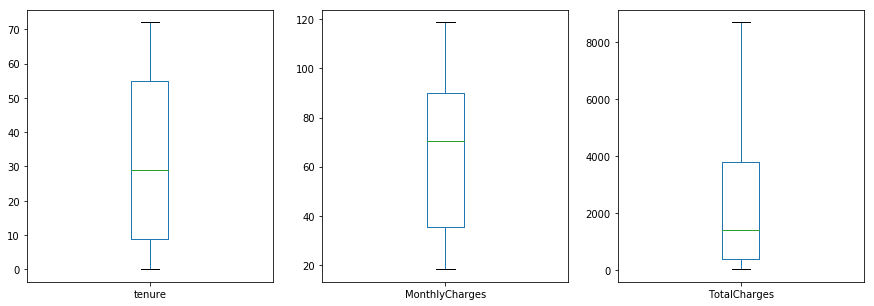

In [10]:
# Boxplots of continuous variables
# box plots
numeric_col.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()

[]

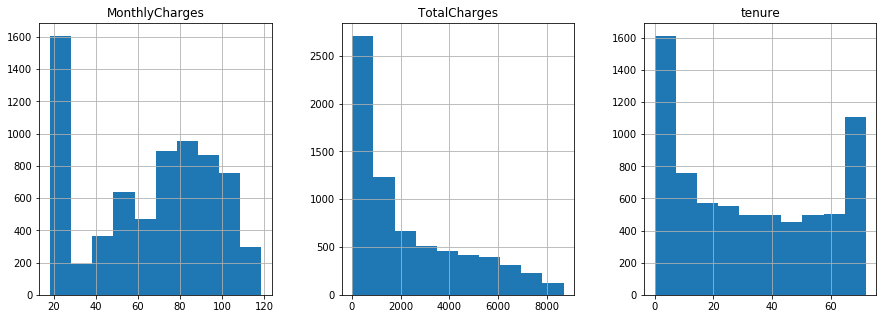

In [11]:
# Histogram plots of continuous variables
numeric_col.hist(layout=(1,3), figsize=(15,5))
plt.plot()

/Users/air/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/air/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


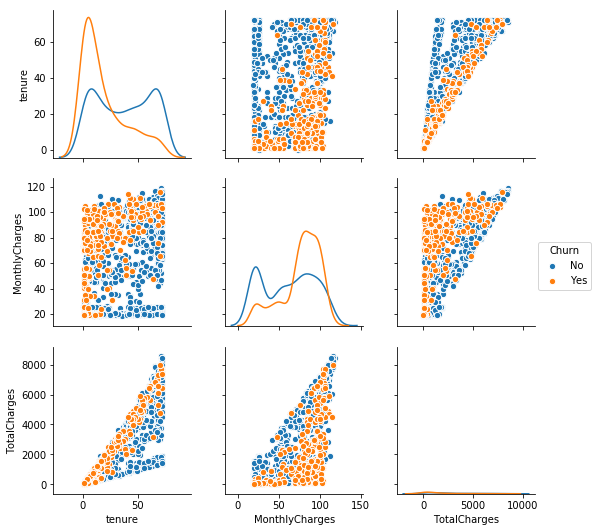

In [12]:
## KDE plot to check the relationship between categorical variables
numeric_col = pd.concat([numeric_col,df["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_col.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

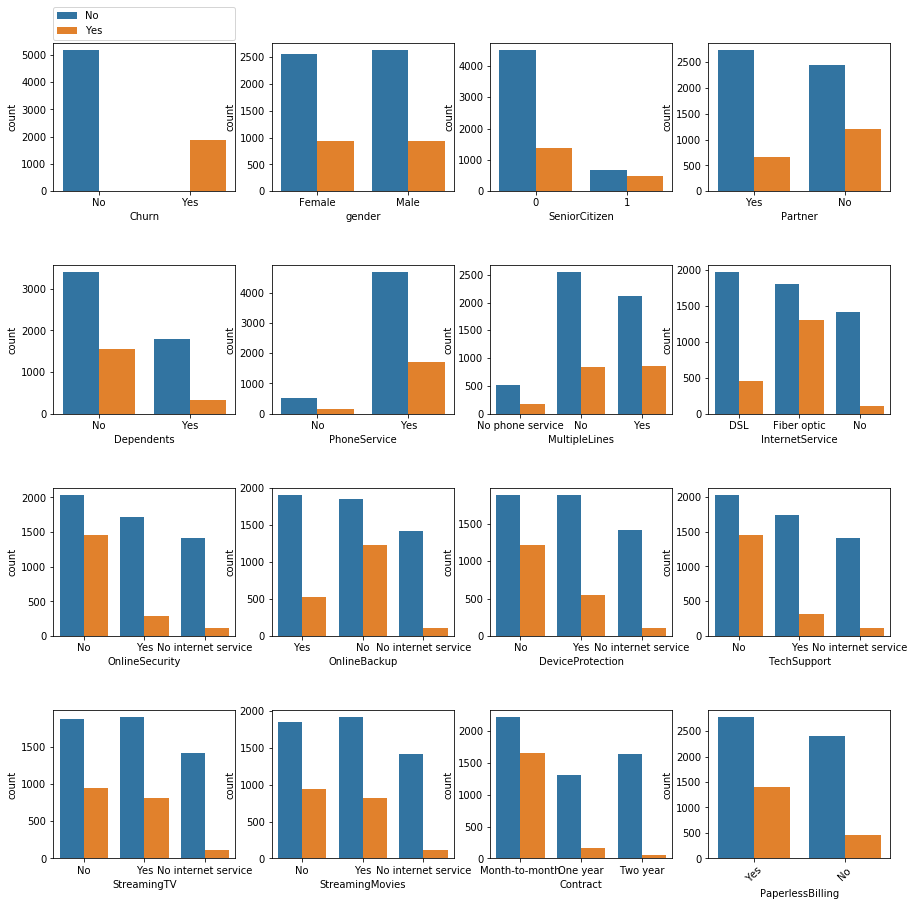

In [13]:
# Plot the proportion of 'Churn' for each categorical variable
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=categorical_col.iloc[:,i], hue=categorical_col["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [14]:
# Convert binary variable to 0 and 1
binary_columns = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']
category_columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
                   , 'StreamingTV','StreamingMovies','PaymentMethod','Contract']

def convert_binary(df,binary_columns):
    for i in binary_columns:
        df[i] = df[i].map(lambda x: 1 if x == 'Yes' else 0)
    df['gender'] = df['gender'].map(lambda x: 1 if x =='Male' else 0)
    return df

df = convert_binary(df,binary_columns)

## Keep an original copy of the dataframe(before generating dummy column)
df_beforedummy = copy.deepcopy(df)

In [15]:
# Create dummy columns for categorical variable with more than 2 distinct values
def generate_dummy(df,category_columns):
    for i in category_columns:
        temp_dummy = pd.get_dummies(df[i],prefix = i)
        df = df.join(temp_dummy)
        df = df.drop(i, axis = 1)
    return df

df = generate_dummy(df,category_columns)

In [16]:
# Convert float and integer column to categorical column
def categorise(df):
    for i in list(df.columns):
        df[i] = pd.Categorical(df[i])
    return df

df = categorise(df)
df = df.dropna()

## Part 2: Feature Selection:

### Initial Feature Selection:

**The dataframe used here is the deep copy of the original dataframe before adding dummy columns: df_beforedummy**

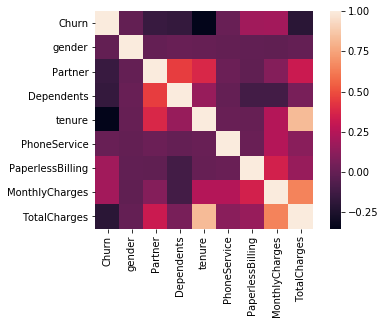

In [17]:
## correlation matrix of different columns
cor = df_beforedummy.corr()
sns.heatmap(cor, square = True)

**<font color='green'>First of all, as we examine the data, we find that the TotalCharges approximately equals to Tensure * Monthly charges<br>
This indicates that the model may be simplied by dropping tensure and monthly charges columns</font>**<br>


In [18]:
#Before dropping those two columns, we first calculate the correlation coefficients
v1 = (df_beforedummy['tenure']*df_beforedummy['MonthlyCharges']).head(n = 300)
v2 = df_beforedummy['TotalCharges'].head(n = 300)

print(np.corrcoef(v1,v2))

[[1.         0.99948304]
 [0.99948304 1.        ]]


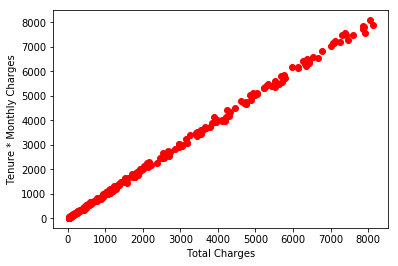

In [19]:
#Make a scatter plot
plt.plot(v2,v1,'ro')
plt.xlabel('Total Charges')
plt.ylabel('Tenure * Monthly Charges')
plt.show()

**<font color ='blue'>This clearly shows a pattern that the product of tensure and monthly charges is strongly correlated with total charges
<br>
Therefore, drop the two columns and simplify the model<font>**

In [20]:
df_beforedummy = df_beforedummy.drop(['tenure','MonthlyCharges'], axis = 1)

**<font color = 'red'>If we dig deeper, we can see that when the value of phone service is 'No', the corresponding values in multiplelines are always 'No phone service'</font>**
<br>
**<font color = 'red'>This means that phone service column has no prediction power and we can drop it</font>**

In [21]:
df_beforedummy = df_beforedummy.drop('PhoneService', axis = 1)

## Part 3: Build Machien Learning models:

* **Build Different modesl with different features and hyperparameters**
* **Compare the predictive accuracy between different models**

In [22]:
## Import Libraries
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

/Users/air/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
## 10-Fold Cross Validation Model
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

In [24]:
# Logistic Regression with L1 regularization
L1_logistic = LogisticRegression(fit_intercept = True, max_iter = 1000, tol = 2e-9, penalty = 'l1', C = 100, random_state = 12345)

### Model 0: Train a logistic regression with train-test-split

In [25]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Do train-test split: 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 12345)

# Fit the model on train data: Using L1-regularization
L1_logistic.fit(X=X_train, y=y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=12345, solver='liblinear', tol=2e-09,
          verbose=0, warm_start=False)

In [26]:
# Predict outputs for test data
y_pred = L1_logistic.predict(X_test)
# Print test accuracy rate
print('Testing accuracy: ',accuracy_score(y_test, y_pred))

Testing accuracy:  0.8071090047393364


In [27]:
# Predict outputs of train dataset
y_pred_train = L1_logistic.predict(X_train)
# Print train accuracy rate
print('Training accuracy: ',accuracy_score(y_train, y_pred_train))

Training accuracy:  0.8043478260869565


### Some remarks: 
**From the figures above, we can clearly tell that the testing accuracy does not differ much from the training accuracy, which suggests that the model does not overfit the training sample**

[[1380  153]
 [ 254  323]]
1380 153 254 323


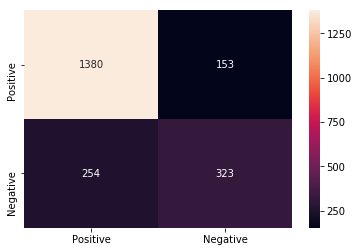

In [28]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print(TN, FP, FN, TP)
sns.heatmap(cm, xticklabels = ['Positive','Negative'],yticklabels = ['Positive','Negative'],annot=True, fmt="d")

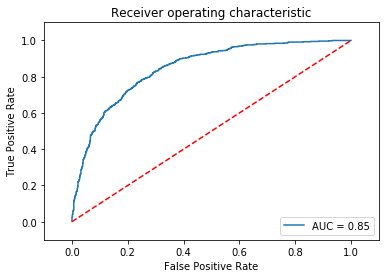

In [29]:
# ROC and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
# lr.classes_
score = L1_logistic.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Secondary Feature selection[based on the coefficients of logistic regression]

In [30]:
coefs = np.std(X_train)*L1_logistic.coef_[0]
df_imp = pd.DataFrame(coefs)
df_imp.columns=["importance"]

df_imp["labels"] = list(df.columns[1:])
df_imp.sort_values("importance", inplace=True, ascending=False)

df_imp

,importance,labels
TotalCharges,6.529630e-01,TotalCharges
InternetService_Fiber optic,5.755650e-01,InternetService_Fiber optic
Contract_Month-to-month,3.326707e-01,Contract_Month-to-month
StreamingMovies_Yes,2.695707e-01,StreamingMovies_Yes
StreamingTV_Yes,2.103362e-01,StreamingTV_Yes
TechSupport_No,1.786859e-01,TechSupport_No
PaperlessBilling,1.586670e-01,PaperlessBilling
PaymentMethod_Electronic check,1.288549e-01,PaymentMethod_Electronic check
MultipleLines_Yes,1.049302e-01,MultipleLines_Yes
OnlineSecurity_No,9.921962e-02,OnlineSecurity_No


**We set a threshold value of 0.07 and any attributes with coefficients between -0.07 and 0.07 will be excluded in order to further simplify the model. These features include:**
 * Gender
 * Online Backup
 * Online Security
 * Partner

**If we investigate deeper, We can find out that the coefficients for all the dummy columns with a value 'No internet service' is close to 0, which clearly suggests that they all have a very low predictive power. **<br><br>
**Therefore, I will instead treat 'No Internet Service' as 'No'(It's quite consistent with our consioucs). In this way, those columns are now binary and the model becomes simpler and more accurate.**


In [31]:
# Turn all the 'No Internet Service' to 'No' and binarize those columns with value 0 and 1
binary_columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df_beforedummy = convert_binary(df_beforedummy,binary_columns)

In [32]:
# Drop 4 columns and create dummy variables
drop_columns = ['gender','OnlineBackup','OnlineSecurity','Partner']
df_beforedummy = df_beforedummy.drop(drop_columns,axis = 1)

category_columns = ['MultipleLines','InternetService','PaymentMethod','Contract']

df_beforedummy = generate_dummy(df_beforedummy,category_columns)
df_beforedummy = categorise(df_beforedummy)
df_beforedummy = df_beforedummy.dropna()

In [33]:
# Address Unbalanced data: Oversampling[For decision tree, random forest and bagging model]
#Set seed first
random.seed(12345)

df_copy = copy.deepcopy(df)
df_beforedummy_copy = copy.deepcopy(df_beforedummy)
# Class count
count_class_0, count_class_1 = df_copy['Churn'].value_counts()

# Divide by class
df_class_0 = df_copy[df_copy['Churn'] == 0]
df_class_1 = df_copy[df_copy['Churn'] == 1]

# Address unblanced data issue: Oversampling on data samples with rare outputs (which is '1' in this example)
df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=12345)
df_copy = pd.concat([df_class_1_over, df_class_0], axis=0)

print(df_copy['Churn'].value_counts())


## Apply the same procudure to df_beforedummy
count_class_0, count_class_1 = df_beforedummy_copy['Churn'].value_counts()

# Divide by class
df_class_0 = df_beforedummy_copy[df_beforedummy_copy['Churn'] == 0]
df_class_1 = df_beforedummy_copy[df_beforedummy_copy['Churn'] == 1]

# Address unblanced data issue: Oversampling on data samples with rare outputs (which is '1' in this example)
df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=12345)
df_beforedummy_copy = pd.concat([df_class_1_over, df_class_0], axis=0)

print(df_beforedummy_copy['Churn'].value_counts())

1    5163
0    5163
Name: Churn, dtype: int64
1    5163
0    5163
Name: Churn, dtype: int64


### Model 1: Logistic Regression(all features)

In [34]:
cv_model_1 = cross_val_score(L1_logistic, # Cross-validation on model_1
                             df.iloc[:,1:], # Feature matrix
                             df.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )

print("Logistic Regression Model(all features): %s" %(cv_model_1.mean()))

Logistic Regression Model(all features): 0.8051756675934308


### Model 2: Logistic Regression(with deleted features)

In [35]:
cv_model_2 = cross_val_score(L1_logistic, # Cross-validation on model_2
                             df_beforedummy.iloc[:,1:], # Feature matrix
                             df_beforedummy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Logistic Regression Model(selected features): %s" %(cv_model_1.mean()))

Logistic Regression Model(selected features): 0.8051756675934308


### Model 3(a): Single Decision Tree(all features,without oversampling)

In [36]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=12345)
cv_model_3a = cross_val_score(decision_tree, # Cross-validation on Model_3
                             df.iloc[:,1:], # Feature matrix
                             df.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Decision Tree Model(all features): %s" %(cv_model_3a.mean()))

Decision Tree Model(all features): 0.7384819927583086


### Model 3(b): Single Decision Tree(all features, with oversampling)

In [37]:
cv_model_3b = cross_val_score(decision_tree, # Cross-validation on Model_3
                             df_copy.iloc[:,1:], # Feature matrix
                             df_copy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Decision Tree Model(all features) and oversampling: %s" %(cv_model_3b.mean()))

Decision Tree Model(all features) and oversampling: 0.8850469393727909


### Model 4: Single Decision Tree(selected features, oversampled)

In [38]:
cv_model_4 = cross_val_score(decision_tree, # Cross-validation on Model 4
                             df_beforedummy_copy.iloc[:,1:], # Feature matrix
                             df_beforedummy_copy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print ("Decision Tree Model(selected features) and oversampled: %s" %(cv_model_4.mean()))

Decision Tree Model(selected features) and oversampled: 0.8852412068409163


### Model 4(a): Gini_index Decision Tree(selected features, oversampled)

In [39]:
decision_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=12345)
cv_model_4a = cross_val_score(decision_tree_gini, # Cross-validation on Model 4
                             df_beforedummy_copy.iloc[:,1:], # Feature matrix
                             df_beforedummy_copy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print ("Gini Decision Tree Model(selected features) and oversampled: %s" %(cv_model_4a.mean()))

Gini Decision Tree Model(selected features) and oversampled: 0.8853374494398043


### Model 5(a): Random Forest

In [40]:
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state = 12345)
cv_model_5a = cross_val_score(random_forest, # Cross-validation on Model 5
                             df.iloc[:,1:], # Feature matrix
                             df.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Random Froest Model: %s" %(cv_model_5a.mean()))

Random Froest Model: 0.7899586189059873


### Model 5(b): Random Forest (oversampled)

In [41]:
cv_model_5b = cross_val_score(random_forest, # Cross-validation on Model 5
                             df_copy.iloc[:,1:], # Feature matrix
                             df_copy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Random Froest Model(oversampled): %s" %(cv_model_5b.mean()))

Random Froest Model(oversampled): 0.9094510044500476


### Model 6: Bagging(oversampled)

In [42]:
bagging = BaggingClassifier(n_estimators=100,random_state = 12345)

cv_model_6 = cross_val_score(bagging, # Cross-validation on Model 6
                             df_copy.iloc[:,1:], # Feature matrix
                             df_copy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print ("Bagging Model: %s" %(cv_model_6.mean()))

Bagging Model: 0.9054821697922062


### Model 7: Bagging(selected features, oversampled)

In [43]:
cv_model_7 = cross_val_score(bagging, # Cross-validation on Model 7
                             df_beforedummy_copy.iloc[:,1:], # Feature matrix
                             df_beforedummy_copy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print ("Bagging Model(selected features): %s" %(cv_model_7.mean()))

Bagging Model(selected features): 0.8953122537652807


### Model 8: AdaBoosting

In [44]:
Adaboost = AdaBoostClassifier(n_estimators=100,random_state = 12345)
cv_model_8 = cross_val_score(Adaboost, # Cross-validation on Model 8
                             df.iloc[:,1:], # Feature matrix
                             df.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Adaboosting Model: %s" %(cv_model_8.mean()))

Adaboosting Model: 0.8044640259278417


### Model 9: AdaBoosting(selected parameters)

In [45]:
cv_model_9 = cross_val_score(Adaboost, # Cross-validation on Model 9
                             df_beforedummy.iloc[:,1:], # Feature matrix
                             df_beforedummy.iloc[:,0], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
print("Adaboosting Model(selected features): %s" %(cv_model_9.mean()))

Adaboosting Model(selected features): 0.8056030162938057


**The average model accuracy is around 0.85, quite a satisfying result**<br>
**Among all the models, Random Forest with oversampled data has the highest predictive accuracy, above 0.9**<br>